# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

## Question 1:
1.  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>

In [3]:
# Your work here.
df.temperature.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
mean = df['temperature'].mean()

In [7]:
std = df['temperature'].std()

In [8]:
samples = np.random.normal(mean, std, size=10000)

Compute ECDF for df['temperature']

In [15]:
x = np.sort(df['temperature'])
n = len(df['temperature'])
y = np.arange(1, n+1) / n

Compute ECDF for samples.

In [16]:
x_theor = np.sort(samples)
n = len(samples)
y_theor = np.arange(1, n+1) / n

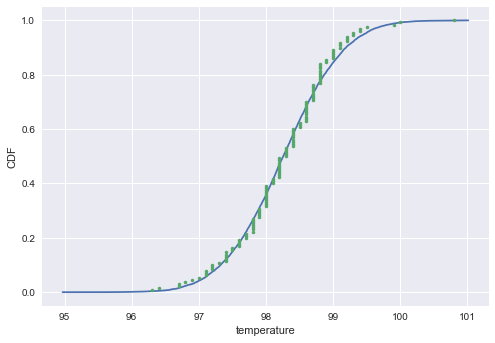

In [17]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('temperature')
_ = plt.ylabel('CDF')
plt.show()

In [18]:
import scipy.stats as stats
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## Question 1 Answer:
  Is the distribution of body temperatures normal? **Yes** 
    <ul>
    <li> Since a) the plotted value of the actual temperature ECDF aligns well with the sample ECDF and b) the p-value of the Normal test Result is much greater than our cut-off point of 0.05, we conclude that the temperature values have a normal distribution.
    </ul>

## Question 2:
 Is the sample size large? Are the observations independent? 
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
    
## Question 2 Answer:
 Is the sample size large? Are the observations independent? **Yes** and **Yes**
    <ul>
    <li> Any sample size over 30 is considered statistically large enough and the temperatures being a normal distribution makes them independent.
    </ul>

## Question 3:
 Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why? **One sample since we're testing the whole data set.**
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? **The z-test is used to compare the population mean against a sample or compare the population mean of two distributions with a sample size greater than 30. The t-test is used to compare the population mean against a sample, or compare the population mean of two distributions with a sample size less than 30, and when you don't know the population's standard deviation. So the z-test will be used.** 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

With a null hypothesis that the true mean = 98.6, we apply the statsmodel ztest.

In [20]:
from statsmodels.stats.weightstats import ztest
ztest(df.temperature,value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Since the p-value is far less than our 0.05 threshold, we reject the null hypothesis and accept the hypothesis that the true population mean does not = 98.6 degress Fahrenheit.

The t-test yields similar, but not quite as definitive, results since the data attributes are more appropriate for the z-test.

In [21]:
stats.ttest_1samp(df.temperature,98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

## Question 4:
  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>

Using a 95% confidence interval, the margin of error, M.E., equals the critcal value x the standard error, S.E.
The critcal value is 1.96 for a 95% confidence interval and the S.E. equals (the sample std)/n**.5

In [22]:
import numpy as np

df_temp_mean = np.mean(df.temperature)
df_temp_sd = np.std(df.temperature)
se = df_temp_sd/np.sqrt(len(df))
me = 1.96*se
confidence_interval = [df_temp_mean-me, df_temp_mean+me]
confidence_interval

[98.123679804428193, 98.374781734033363]

Someone's temperature below ~98.1 or above ~98.4 would be classified as "abnormal.

## Question 5:
  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>

Creating two samples:

In [23]:
female_temps = np.array(df.temperature[df.gender=='F'])
male_temps = np.array(df.temperature[df.gender=='M'])

print(len(male_temps))
print(len(female_temps))

65
65


Using a t-test, since the population standard deviation is umknown:

In [24]:
stats.ttest_ind(female_temps, male_temps)

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.023931883122395609)

With the p-value well below 0.05, we can reject the null hypothesis and state that: **There is a significant difference between the normal temperature of males and females.**

## Conclusion:
  Primarily because the thermometers used 120 years ago were much more difficult to accurately calibrate correctly and based on new measurements, the best estimate for the normal human temperature is now ~98.25 degress Fahrenheit.
  
  In fact, someone with a temperature of 98.6 is now considered to be 0.2 degress above normal.
  
  Also, some allowance needs to be included for the fact that the average female temperature is ~ 0.3 degress higher than the average male. Further studies need to be conducted to determine if this discrepancy is age dependent or if the difference has any correlation with females utilizing a larger percentage of their brain cells.